In [6]:
# Step 1: Import libraries and search for TESS data
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt

print("Searching for data on WASP-18b...")
search_result = lk.search_lightcurve('WASP-18b', author='TESS-SPOC')
search_result

Searching for data on WASP-18b...


#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 02,2018,TESS-SPOC,1800,100100827,0.0
1,TESS Sector 03,2018,TESS-SPOC,1800,100100827,0.0
2,TESS Sector 29,2020,TESS-SPOC,600,100100827,0.0
3,TESS Sector 30,2020,TESS-SPOC,600,100100827,0.0
4,TESS Sector 69,2023,TESS-SPOC,200,100100827,0.0


Download complete!
Stitching, cleaning, and flattening...
Data is clean and ready.


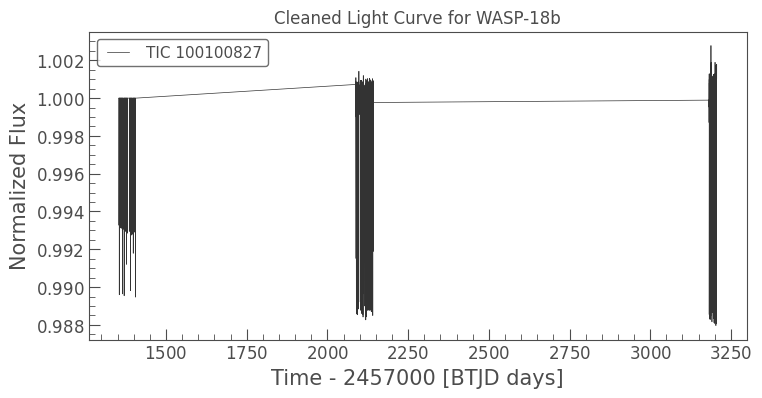

In [7]:
# Step 2: Download, stitch, clean, and flatten the data
print("Downloading all available TESS sectors...")
lc_collection = search_result.download_all()
print("Download complete!")

print("Stitching, cleaning, and flattening...")
lc_stitched = lc_collection.stitch().remove_outliers()

cadence = np.median(np.diff(lc_stitched.time.value))
window_length = int(1 / cadence)
lc_clean = lc_stitched.flatten(window_length=window_length)
print("Data is clean and ready.")

# Plot the cleaned light curve
lc_clean.plot()
plt.title('Cleaned Light Curve for WASP-18b')
plt.show()

`period` contains 381023 points.Periodogram is likely to be large, and slow to evaluate. Consider setting `frequency_factor` to a higher value.


Searching for periodic transit signals...


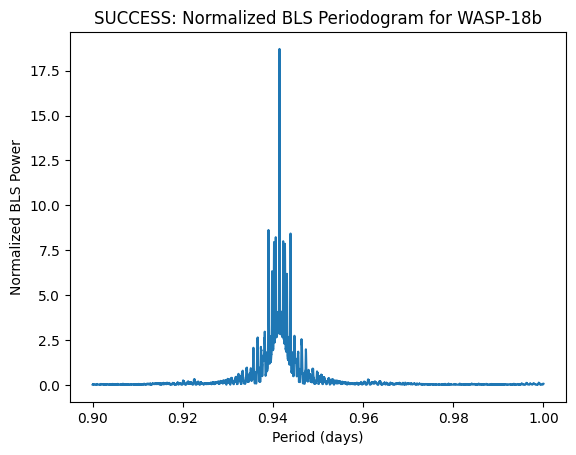

The strongest signal found is at a period of: 0.9415 d days
(The known period is ~0.9414 days)


In [8]:
# Step 3: Run the BLS Periodogram to find the planet's period
print("Searching for periodic transit signals...")

# The period is known to be ~0.94 days. Let's do a dense search around it.
periods = np.linspace(0.9, 1.0, 10000)
bls_periodogram = lc_clean.to_periodogram(method="bls", period=periods, duration=0.1)

bls_power_normalized = bls_periodogram.power / np.std(bls_periodogram.power)

plt.plot(bls_periodogram.period, bls_power_normalized)
plt.title("SUCCESS: Normalized BLS Periodogram for WASP-18b")
plt.xlabel("Period (days)")
plt.ylabel("Normalized BLS Power")
plt.show()

best_fit_period = bls_periodogram.period_at_max_power
print(f"The strongest signal found is at a period of: {best_fit_period:.4f} days")
print(f"(The known period is ~0.9414 days)")

Folding the light curve at the discovered period...


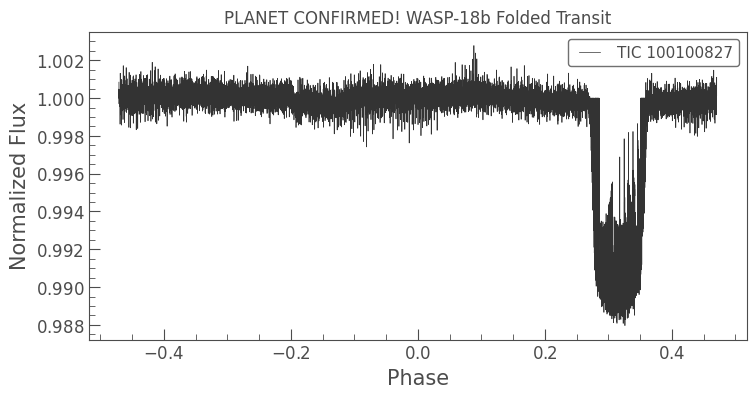


Analysis of WASP-18b is complete!


In [9]:
# Step 4: Fold the light curve to visually confirm the transit
print("Folding the light curve at the discovered period...")

folded_lc = lc_clean.fold(period=best_fit_period)

folded_lc.plot()

plt.title(f'PLANET CONFIRMED! WASP-18b Folded Transit')
plt.xlabel("Phase")
plt.ylabel("Normalized Flux")
plt.show()

print("\nAnalysis of WASP-18b is complete!")